# **Master’s in Applied Artificial Intelligence**
## **Course: Artificial Intelligence and Machine Learning**
### Prof. Luis Eduardo Falcón Morales
#### Tecnológico de Monterrey

### **Social Media Advertising Campaigns - Regression Models**
##### **Name and student ID:**
* Mario Guillen de la Torre - A01796701

## **Introduction**

We will work with the "dataset_Facebook.csv" file, which you can find at the following link:

https://archive.ics.uci.edu/dataset/368/facebook+metrics

These data are associated with the following article by Moro et al. from ELSEVIER, which you must download to answer several of the questions in this activity (access is free):

https://www.semanticscholar.org/paper/Predicting-social-media-performance-metrics-and-of-Moro-Rita/dec55692590820754b53c916e29bb2b42c0e5104


**NOTE: Do not modify the code except where indicated.**

In [6]:
# You can include more libraries, if necessary:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, OrdinalEncoder, FunctionTransformer

from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR

from sklearn import metrics
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV

from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.inspection import permutation_importance

import warnings
warnings.filterwarnings('ignore')

## **Exercise 1**


### **Describe the Learning Cures method used to monitor a model's undertraining or overtraining.**

#### NOTE: You can refer to the sklearn documentation for support:

https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html#sphx-glr-auto-examples-model-selection-plot-learning-curve-py



#### ++++++++ Section for adding text begins: +++++++++++

The "Learning Curves" method consists of analyzing how the error in the training and validation sets changes throughout the model's training. Both are graphed with the error on the Y axis and the training iterations on the X axis.

From the resulting graph, both curves are expected to converge to a low error with little separation between them (the validation curve will always have a higher error). If the model is undertrained, both curves remain with a high level of error without significantly reducing over the cycles. If the model is overtrained, the training curve will have a much lower error than the validation curve.

#### ++++++++ Section for adding text ends. +++++++++++

## **Exercise 2**

#### **According to the article by Moro et al. in ELSEVIER, answer the following questions:**

* **a. What is the objective of the problem posed in the article?**


#### ++++++++ Section for adding text begins: +++++++++++
The goal is to create a model that can predict the individual impact of social media posts so that business managers can make better decisions when communicating with the public and create posts that will have greater impact.

In addition to the model, the following are expected:

* Correctly predict the impact of a post given its characteristics.
* Evaluate the predictive value of the model by comparing it with real metrics.
* Identify which characteristics most affect the results.
* Define a causal relationship between the knowledge found and brand strengthening.

#### ++++++++ Section for adding text ends. +++++++++++

* **b. Describe below the meaning of each of the 8 variables we will work with, according to the information in Tables 2 and 3 of the article by Moro et.al.**

#### ++++++++ Section for adding text begins: +++++++++++

* Post Lifetime: The number of people who clicked anywhere in a post.
* Category: Manual categorization of content.
* Page Total Likes: Number of people who have liked the company's page.
* Type: Content type.
* Post Month: Month in which it was published.
* Post Hour: Time in which it was published.
* Post Weekday: Day of the week on which it was published.
* Paid: If the advertising was paid for on Facebook.

#### ++++++++ Section for adding text ends. +++++++++++

#### **In this activity, you'll only work with model fitting, so you shouldn't modify the processing part. We'll only make a few minor adjustments.**

In [16]:
# We load the data from the file:

data = pd.read_csv('dataset_Facebook.csv', sep=';', header='infer')
print('Total records and variables:',data.shape)
data.head(3).T

Total records and variables: (500, 19)


,0,1,2
Page total likes,139441,139441,139441
Type,Photo,Status,Photo
Category,2,2,3
Post Month,12,12,12
Post Weekday,4,3,3
Post Hour,3,10,3
Paid,0.0,0.0,0.0
Lifetime Post Total Reach,2752,10460,2413
Lifetime Post Total Impressions,5091,19057,4373
Lifetime Engaged Users,178,1457,177


## **Exercise 3**

### **Temporal Variables**

**Remember that temporal variables can be treated as categorical or numerical variables, depending on the context. In our case, the variables month, day of the week, and time the post was posted could be considered ordinal categorical variables. However, to remember how they are transformed in each of these cases (numeric and categorical), we will consider the month and day of the week variables as ordinal categorical variables and the hour variable as a cyclic variable.**

**In Table 3 of the ELSEVIER article, they tell us that the Post_hour variable is labeled from 0 to 23, so 24 hours would be 0 hours. That is, it has a 24-hour cyclical behavior, which in mathematical terms is said to be a cyclic variable modulo 24. Thus, 24 hours will be equivalent to 0 hours.**

**The way to transform a cyclic variable T modulo M is to replace the original column of the variable T with the following two columns. This is what is called feature engineering within data science:**

$Tsin = sin(2*\pi*T/M)$

$Tcos = cos(2*\pi*T/M)$

#### NOTE: Where None is indicated, you can add as many lines of code as you consider necessary.

In [20]:
# Exercise 3a:

# Define two new variables, "hours_without" and "hours_cos" from the
# variable "Post Hour" and according to the previously indicated:


# ++++++++++++++ Include your code here  ++++++++++++++++++++++++++++++

horas_sin = np.sin(2 * np.pi * data['Post Hour'] / 24)
horas_cos = np.cos(2 * np.pi * data['Post Hour'] / 24)

# +++++++++++++ Section to add code ends +++++++++++++++++++++

In [21]:
# Exercise 3b:

# Add these two new variables to your DataFrame
# and remove the "Post Hour" column:

# ++++++++++++++ Include your code here  ++++++++++++++++++++++++++++++

data['horas_sin'] = horas_sin
data['horas_cos'] = horas_cos
data.drop(['Post Hour'],axis=1,inplace=True)

# +++++++++++++ Section to add code ends +++++++++++++++++++++


# Let's see what we have so far:
data.head(3).T

,0,1,2
Page total likes,139441,139441,139441
Type,Photo,Status,Photo
Category,2,2,3
Post Month,12,12,12
Post Weekday,4,3,3
Paid,0.0,0.0,0.0
Lifetime Post Total Reach,2752,10460,2413
Lifetime Post Total Impressions,5091,19057,4373
Lifetime Engaged Users,178,1457,177
Lifetime Post Consumers,109,1361,113


In [22]:
# From Tables 2 and 3 of the ELSEVIER article, we selected the variables that
# we will work on in this Activity.

# We separate the input data (see Table 3 of the article) and the output variable (see Table 2):
X = data[['Page total likes', 'Type', 'Category', 'Post Month', 'Post Weekday', 'Paid', 'horas_sin', 'horas_cos']]
y = data[['Lifetime Post Consumers']]   # There are 12 output variables, but we'll only work with the
                                        # one that was considered the most important in the ELSEVIER article.


# We partition into Train, Validation and Test with a 70-15-15 ratio:
Xtrain, Xtv, ytrain, ytv = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=7)
Xval, Xtest, yval, ytest = train_test_split(Xtv, ytv, test_size=0.5, shuffle=True, random_state=7)


print('Train:', Xtrain.shape, ytrain.shape)
print('Val:', Xval.shape, yval.shape)
print('Test:', Xtest.shape, ytest.shape)

Train: (350, 8) (350, 1)
Val: (75, 8) (75, 1)
Test: (75, 8) (75, 1)


In [23]:
Xtrain.describe(include='all').T    # Let's look at some numerical data descriptions of the training set.
                                    # In particular, the standard deviations (std) displayed.

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Page total likes,350.0,NaN,NaN,NaN,123412.534286,16145.534825,81370.0,111972.0,129600.0,136393.0,139441.0
Type,350,4,Photo,301,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Category,350.0,NaN,NaN,NaN,1.9,0.862295,1.0,1.0,2.0,3.0,3.0
Post Month,350.0,NaN,NaN,NaN,7.088571,3.309383,1.0,4.0,7.0,10.0,12.0
Post Weekday,350.0,NaN,NaN,NaN,4.151429,2.047414,1.0,2.0,4.0,6.0,7.0
Paid,349.0,NaN,NaN,NaN,0.286533,0.452791,0.0,0.0,0.0,1.0,1.0
horas_sin,350.0,NaN,NaN,NaN,0.443653,0.45043,-1.0,0.258819,0.5,0.707107,1.0
horas_cos,350.0,NaN,NaN,NaN,-0.191939,0.75209,-1.0,-0.866025,-0.5,0.707107,0.965926


### **Categorical Variable Adjustment in Pipeline**

**Let's look at an example of how to adjust a categorical variable in which one of its levels doesn't have enough information, for example, so that each level doesn't have at least 5% of the information. We'll then regroup the smaller levels until we get 5%, using a function we can use within the Pipeline to avoid information leakage.**

In [25]:
# Let's get the unique labels from data['Type'] sorted from highest to lowest frequency:
Xtrain['Type'].unique()

array(['Photo', 'Status', 'Link', 'Video'], dtype=object)

In [26]:
Xtrain['Type'].value_counts() / Xtrain.shape[0]     # Following the policy that each level of a variable has
                                                    # at least 5% information, we will group the "Link"
                                                    # and "Video" cases into a new level that could be interpreted as "Other."

Type
Photo     0.860000
Status    0.082857
Link      0.045714
Video     0.011429
Name: count, dtype: float64

In [27]:
# We define the function that will carry out this transformation within the Pipeline:

def mi_type(x):
  x = x.values.ravel()  # We convert it to a 1D array
  x = pd.Series(x, name='Type')  # we select the column as Series type data
  x.loc[:] = x.map({'Photo':1, 'Status':2, 'Link':0, 'Video':0})  # You could also label them as 3, instead of 0.
  return x.values.reshape(-1, 1)    # We adjust the dimension to a column vector.

### **Transformation on the Output Variable**

In [29]:
ytrain.describe().T   # Output variable information.

,count,mean,std,min,25%,50%,75%,max
Lifetime Post Consumers,350.0,780.517143,770.963085,9.0,336.75,543.0,959.0,5934.0


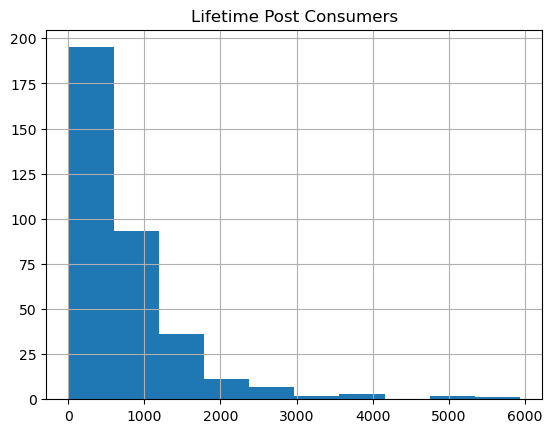

In [30]:
# We observe below that there is a clear positive bias in the output variable:
ytrain.hist();

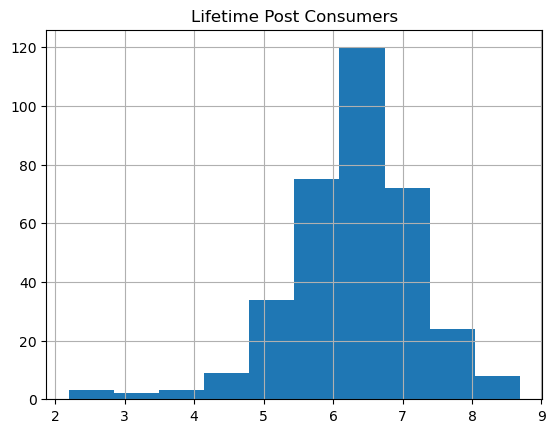

In [31]:
ytrainlog = np.log(ytrain)   # Remember that our output variable
ytrainlog.hist();            # in a Regression problem is recommended to be approximately
                             # bell-shaped, so we will fit it with the natural logarithm
                             # as a first approximation.

In [32]:
# For a first approximation, we can say that the distribution with the logarithm fits acceptably
# to a bell-shaped distribution.
# We then proceed in the same way with Val and Test:
yvallog = np.log(yval)
ytestlog = np.log(ytest)

In [33]:
# We'll apply the bare minimum of transformations.
# The new variables hours_sin and hours_cos are already scaled between -1 and +1, so
# we can leave them as is and just take care of any missing data.

num_pipe = Pipeline(steps = [('numImp', SimpleImputer(strategy='median')),
                             ('scaler', MinMaxScaler())
                             ])
num_pipe_nombres = [0]   


# We identify the ordinals as such:
ord_pipe = Pipeline(steps =  [('OrdImp', SimpleImputer(strategy='most_frequent')),
                              ('Ordfun', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1 ))
                              ])
ord_pipe_nombres = [3,4]   # ['Post Month', 'Post Weekday']


# Transformation of the input categorical factor "Type":
catMap_pipe = Pipeline(steps = [('catMap', FunctionTransformer(mi_type))])
catMap_pipe_nombres = ['Type']


# We transform the nominal values with One-Hot-Encoder:
nom_pipe = Pipeline(steps = [('NomImp', SimpleImputer(strategy='most_frequent')),
                             ('ohe', OneHotEncoder(drop='first',
                                                   handle_unknown='ignore',
                                                   ))])
nom_pipe_nombres = [1,2,5]  # ['Type', 'Category', 'Paid']


# Numeric variables with time:
hora_pipe = Pipeline(steps = [('HoraImp', SimpleImputer(strategy='mean'))])
hora_pipe_nombres = [6,7]   # ['horas_sin', 'horas_cos']


# We put together the transformations that we will apply:
columnsTransformer = ColumnTransformer(transformers = [('numpow', num_pipe, num_pipe_nombres),
                                                        ('catOrd', ord_pipe, ord_pipe_nombres),
                                                        ('catNom', nom_pipe, nom_pipe_nombres),
                                                        ('catmap', catMap_pipe, catMap_pipe_nombres),
                                                        ('hora', hora_pipe, hora_pipe_nombres)
                                                        ],
                                        remainder='passthrough')



# Just to know the new number of columns after the transformations:
XtrainT = columnsTransformer.fit_transform(Xtrain)  # We adjust with Train...
print('Original input variables:', Xtrain.shape)
print('Transformed input variables:', XtrainT.shape)

Original input variables: (350, 8)
Transformed input variables: (350, 12)


### **Criteria for determining whether a model is undertrained in a Regression problem:**

In [35]:
# There are several criteria for determining whether a regression model is undertrained.
# Let's look at some of them below.

# The RMSE (Root-Mean-Square-Error) value is used to measure the minimum performance that a regression model should achieve. 
# That is, this value is usually taken as the value of the undertrained model and is generally compared to the standard deviation 
# of the output variable, whether you are using the original data or the transformed data.
# Let's look at the values of both:

print('Desv-Est y-original: %.3f' % ytrain.values.std(ddof=1))        # Let's use the sample standard deviation
print('Desv-Est y-logarithm: %.3f' % ytrainlog.values.std(ddof=1))    # adjusting the degrees of freedom.

Desv-Est y-original: 770.963
Desv-Est y-logarithm: 0.916


**Remember that the standard deviation is in the same units as the original variable, so in this case, the standard deviation indicates approximately 771 people who clicked on some part of the post.**

**In this activity, we will be comparing errors in terms of the logarithm of the output variable, so our reference value will be the value you obtain in Std_Dev and log_dev=0.916 (approximately). Thus, the RMSE errors of the predicted values and the actual values of the models you will be obtaining must be less than this value so as not to consider them undertrained.**

**NOTE on the degrees of freedom (ddof) (delta degree of freedom):**

See documentation: https://numpy.org/doc/stable/reference/generated/numpy.std.html

**Strictly speaking, from a mathematical point of view, the standard deviations calculated should be the sample standard deviations, that is, std(ddof=1). However, in practice, it is very common to use the function with its default value, ddof=0, which translates to calculating the population standard deviation. I repeat, in practice, this adjustment is often overlooked because when you have data with thousands or more records, the difference between the population and sample results is minimal. In this activity, I mention it only as a reminder, and if you have fewer than 100 records, you should make this adjustment, as the difference between the two could already be significant.**

In [38]:
# Como se va a utilizar Validación-Cruzada, concatenamos los conjuntos de entrenamiento y validación
# en uno nuevo conjunto aumentado que llamaremos trainval para utilizar como entrenamiento:

Xtrainval = pd.concat([Xtrain, Xval], axis=0)
ytrainvallog = pd.concat([ytrainlog, yvallog], axis=0)

## **Exercise 4**


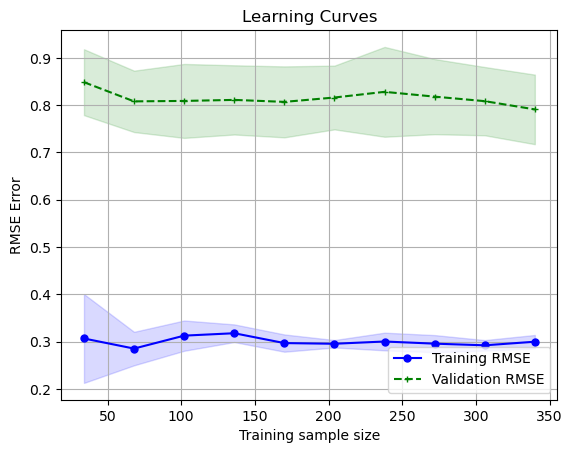

In [40]:
# Exercise 4a.

# By running the following lines of code, determine whether the Random Forest 
# model with its default hyperparameter values is undertrained or overtrained. 
# If so, find the hyperparameter values you consider most appropriate so 
# that it is no longer undertrained or overtrained:


# ++++++++++++++ Include your code here  ++++++++++++++++++++++++++++++
themodel_RF = RandomForestRegressor()
# +++++++++++++ Section to add code ends +++++++++++++++++++++



mipipe = Pipeline(steps=[('ct',columnsTransformer),('m', themodel_RF)])

train_sizes, train_scores, val_scores = learning_curve(estimator=mipipe,
                                                        X=Xtrainval,
                                                        y=np.ravel(ytrainvallog),
                                                        cv=5,
                                                        train_sizes= np.linspace(0.1, 1.0, 10),
                                                        scoring= 'neg_mean_squared_error',  # MSE error 
                                                        n_jobs=-1)



# We calculate the training averages and standard deviations for RMSE,
# since we have the MSE values, we must obtain their square root. The negative is because
# sklearn actually returns the negative of the Root Mean Square Error (MSE):

rmse_train_scores = np.sqrt(-train_scores)
rmse_val_scores = np.sqrt(-val_scores)

train_mean = np.mean(rmse_train_scores, axis=1)
train_std = np.std(rmse_train_scores, axis=1, ddof=1)   # Here we also make the adjustment of the sample standard deviation.
val_mean = np.mean(rmse_val_scores, axis=1)
val_std = np.std(rmse_val_scores, axis=1, ddof=1)


plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training RMSE')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')

plt.plot(train_sizes, val_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation RMSE')
plt.fill_between(train_sizes, val_mean + val_std, val_mean - val_std, alpha=0.15, color='green')

plt.title('Learning Curves')
plt.xlabel('Training sample size')
plt.ylabel('RMSE Error')
plt.grid()
plt.legend(loc='lower right')
plt.show()


#### **Function to display graph**

In [42]:
# Incluye a continuación las celdas y líneas de código que consideres necesarias
# para responder el Ejercicio 5a, 5b y 5c.

def DeployVisual(myModel,title):
  mipipe = Pipeline(steps=[('ct',columnsTransformer),('m', myModel )])

  train_sizes, train_scores, val_scores = learning_curve(estimator=mipipe, X=Xtrainval, y=np.ravel(ytrainvallog), cv=5, train_sizes= np.linspace(0.1, 1.0, 10), scoring= 'neg_mean_squared_error', n_jobs=-1)

  rmse_train_scores = np.sqrt(-train_scores)
  rmse_val_scores = np.sqrt(-val_scores)

  train_mean = np.mean(rmse_train_scores, axis=1)
  train_std = np.std(rmse_train_scores, axis=1, ddof=1)
  val_mean = np.mean(rmse_val_scores, axis=1)
  val_std = np.std(rmse_val_scores, axis=1, ddof=1)

  plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training RMSE')
  plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
  for x, y in zip(train_sizes, train_mean):
      plt.text(x, y, f'{y:.2f}', fontsize=10, verticalalignment='bottom', horizontalalignment='right',color='blue')

  plt.plot(train_sizes, val_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation RMSE')
  plt.fill_between(train_sizes, val_mean + val_std, val_mean - val_std, alpha=0.15, color='green')
  for x, y in zip(train_sizes, val_mean):
      plt.text(x, y, f'{y:.2f}', fontsize=10, verticalalignment='bottom', horizontalalignment='right', color='green')

  plt.title(title)
  plt.xlabel('Training sample size')
  plt.ylabel('RMSE Error')
  plt.grid()
  plt.legend(loc='lower right')
  plt.show()

#### **Exercise 4a. Search for better hyperparameters**

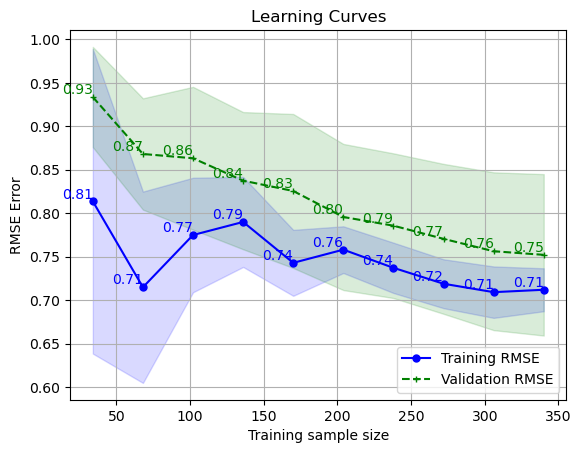

In [44]:
param_grid = {
    'm__n_estimators': [80, 90,100],
    'm__max_depth': [2,3,4],
    'm__min_samples_split': [7],
    'm__min_samples_leaf': [7],
    'm__max_features': ['sqrt'],
    'm__bootstrap': [True],
    'm__criterion': ['squared_error'],
    'm__random_state': [42],
    'm__max_samples': [.8,0.85,1]
}

mipipe = Pipeline(steps=[('ct',columnsTransformer),('m', RandomForestRegressor(random_state=42))])
grid_search = RandomizedSearchCV(mipipe , param_grid, n_iter=2000, cv=5, random_state=42, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(Xtrainval, np.ravel(ytrainvallog))

best_params = grid_search.best_params_
best_params_no_prefix = {k.replace('m__', ''): v for k, v in best_params.items()}

themodel_RF = RandomForestRegressor(**best_params_no_prefix)
DeployVisual(themodel_RF,"Learning Curves")

#### **Exercise 4b. Calculate the RMSE of the best fit to the test data**

In [46]:
# Exercise 4b.

# Once you've verified that the model is neither overtrained nor undertrained,
# we can calculate the RMSE of the best fit using the test data.
# Include the values for your best hyperparameters found from RandomForest:

# ++++++++++++++ Include your adjustments here ++++++++++++++++++++++++++++++

themodel_RF = RandomForestRegressor(**best_params_no_prefix)

# ++++++++++++++ End adjustments section ++++++++++++++++++++++


mipipe = Pipeline(steps=[('ct',columnsTransformer),('m', themodel_RF)])
mipipe.fit(pd.DataFrame(Xtrainval, columns=Xtrain.columns), np.ravel(ytrainvallog))
yhattest_RF = mipipe.predict(Xtest)

print('Error RSME(Test) of Random Forest: %.3f' % np.sqrt(mean_squared_error(np.ravel(ytestlog), yhattest_RF)))

Error RSME(Test) of Random Forest: 0.729


## **Exercise 5**

**Repeat the same process as in Exercise 4 above to obtain the hyperparameters that lead us to cases of non-undertrained or overtrained models, in each of the following cases:**

* **a. Extreme Gradient Boost (XGBoost)**
* **b. Support Vector Machine (SVM)**
* **c. Multilayer Perceptron Neural Network (MLP)**

#### **a. Extreme Gradient Boost XGBoost**

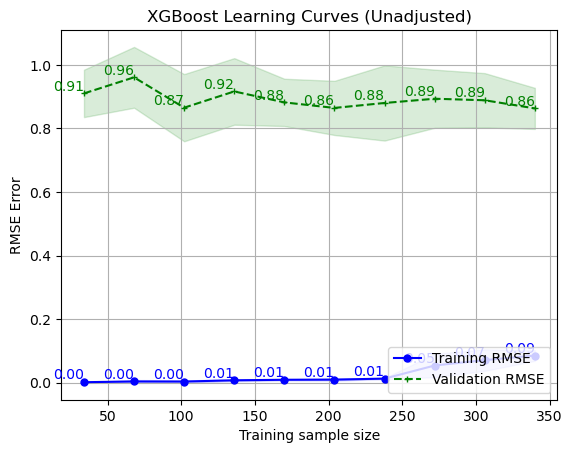

In [50]:
DeployVisual(XGBRegressor(),'XGBoost Learning Curves (Unadjusted)')

In [51]:
param_grid = {
    'm__n_estimators': [200],
    'm__learning_rate': [.001,.00175],
    'm__max_depth': [12,15,20],
    'm__min_child_weight': [5,7,10],
    'm__gamma': [.1,.25,.5],
    'm__lambda': [.1,.25,0.5],
    'm__alpha': [ .1,.25,0.5],
    'm__njobs': [-1]
}

mipipeXGB = Pipeline(steps=[('ct',columnsTransformer),('m', XGBRegressor())])
halving_grid = RandomizedSearchCV(mipipeXGB  , param_grid, n_iter=1000, cv=5, scoring='neg_mean_squared_error',random_state=42 ,n_jobs=-1)
halving_grid.fit(Xtrainval, np.ravel(ytrainvallog))

best_XGB_params = halving_grid.best_params_
best_XGB_params_no_prefix = {k.replace('m__', ''): v for k, v in best_XGB_params.items()}

elmodelo_XGB = XGBRegressor(**best_XGB_params_no_prefix)
print(best_XGB_params)

{'m__njobs': -1, 'm__n_estimators': 200, 'm__min_child_weight': 10, 'm__max_depth': 12, 'm__learning_rate': 0.00175, 'm__lambda': 0.1, 'm__gamma': 0.25, 'm__alpha': 0.1}


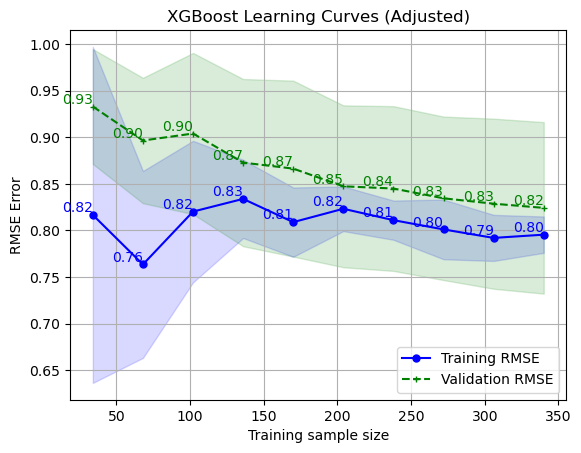

In [52]:
DeployVisual(elmodelo_XGB,'XGBoost Learning Curves (Adjusted)')

In [53]:
mipipeXGB  = Pipeline(steps=[('ct',columnsTransformer),('m', elmodelo_XGB)])
mipipeXGB.fit(pd.DataFrame(Xtrainval, columns=Xtrain.columns), np.ravel(ytrainvallog))
yhattest_XGB = mipipeXGB.predict(Xtest)

print('Error RSME(Test) of XGB: %.3f' % np.sqrt(mean_squared_error(np.ravel(ytestlog), yhattest_XGB)))

Error RSME(Test) of XGB: 0.740


#### **b. Máquina de Vector Soporte SVM**

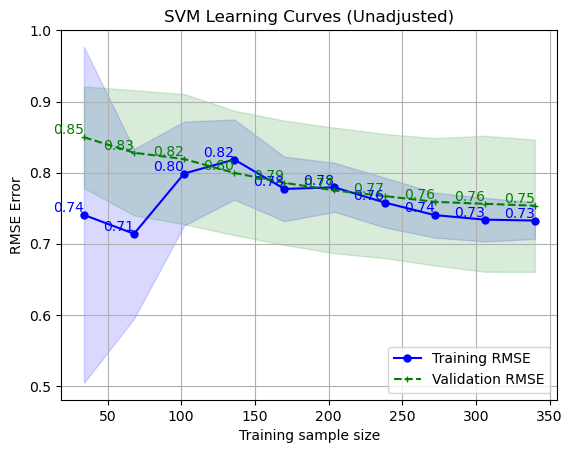

In [55]:
DeployVisual(SVR(),'SVM Learning Curves (Unadjusted)')

In [56]:
param_grid = {
    'm__C': [0.1, .5,1, 2],
    'm__gamma': [.01,0.1,1],
    'm__epsilon': [0.1, 0.25,.5],
    'm__degree': [2,3,4,5],
    'm__coef0': [ 1,1.5, 2],
    'm__kernel': ['poly']
}

mipipeSVR = Pipeline(steps=[('ct',columnsTransformer),('m', SVR())])
halving_grid = HalvingGridSearchCV(mipipeSVR , param_grid, factor=2, cv=5, scoring='neg_mean_squared_error',random_state=42, n_jobs=-1)
halving_grid.fit(Xtrainval, np.ravel(ytrainvallog))

best_SVR_params = halving_grid.best_params_
best_SVR_params_no_prefix = {k.replace('m__', ''): v for k, v in best_SVR_params.items()}

elmodelo_SVR = SVR(**best_SVR_params_no_prefix)
print(best_SVR_params)

{'m__C': 0.5, 'm__coef0': 1, 'm__degree': 4, 'm__epsilon': 0.5, 'm__gamma': 0.01, 'm__kernel': 'poly'}


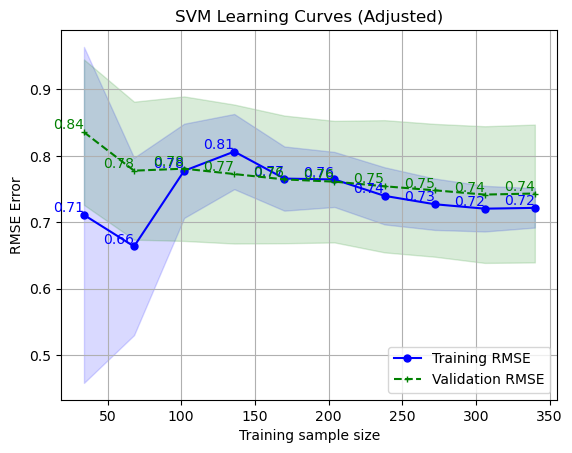

In [57]:
DeployVisual(elmodelo_SVR,'SVM Learning Curves (Adjusted)')

In [58]:
mipipeSVR = Pipeline(steps=[('ct',columnsTransformer),('m', elmodelo_SVR)])
mipipeSVR.fit(pd.DataFrame(Xtrainval, columns=Xtrain.columns), np.ravel(ytrainvallog))
yhattest_SVR = mipipeSVR.predict(Xtest)

print('Error RSME(Test) of SVM: %.3f' % np.sqrt(mean_squared_error(np.ravel(ytestlog), yhattest_SVR)))

Error RSME(Test) of SVM: 0.738


#### **c. Red Neuronal Perceptrón Multicapa MLP**

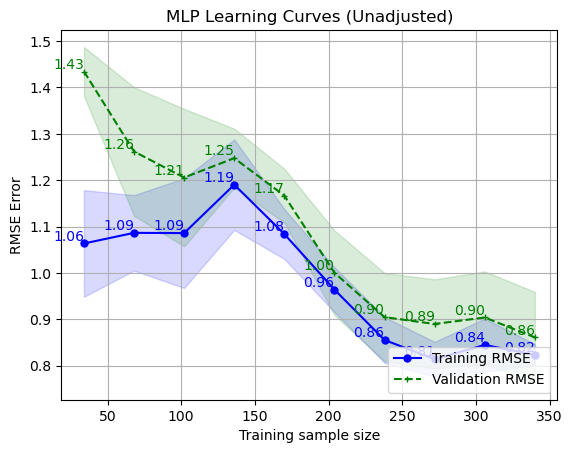

In [60]:
DeployVisual(MLPRegressor(),'MLP Learning Curves (Unadjusted)')

In [61]:
param_grid = {
    'm__hidden_layer_sizes': [ (25, 25)],
    'm__activation': ['tanh'],
    'm__solver': ['adam'],
    'm__alpha': [0.001, 0.0005],
    'm__learning_rate_init': [ 0.0005,0.0001],
    'm__max_iter': [1250,1500],
    'm__learning_rate':['constant'],
    'm__random_state':[42]
}

mipipeMLP = Pipeline(steps=[('ct',columnsTransformer),('m', MLPRegressor())])
halving_grid = RandomizedSearchCV(mipipeMLP , param_grid, n_iter=1000, cv=5, scoring='neg_mean_squared_error',random_state=42 ,n_jobs=-1)
halving_grid.fit(Xtrainval, np.ravel(ytrainvallog))

best_MLP_params = halving_grid.best_params_
best_MLP_params_no_prefix = {k.replace('m__', ''): v for k, v in best_MLP_params.items()}

elmodelo_MLP =  MLPRegressor(**best_MLP_params_no_prefix)
print(best_MLP_params)

{'m__solver': 'adam', 'm__random_state': 42, 'm__max_iter': 1250, 'm__learning_rate_init': 0.0005, 'm__learning_rate': 'constant', 'm__hidden_layer_sizes': (25, 25), 'm__alpha': 0.0005, 'm__activation': 'tanh'}


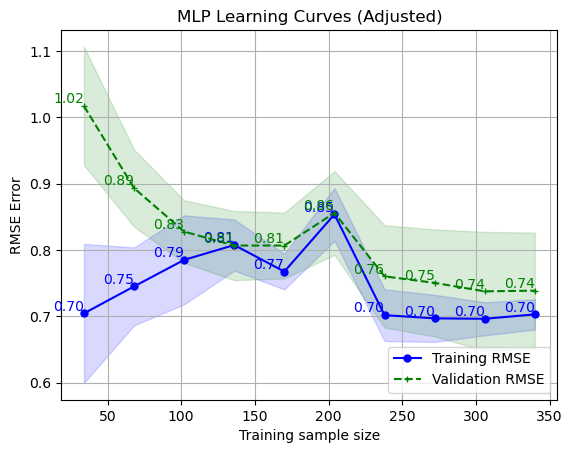

In [62]:
DeployVisual(elmodelo_MLP,'MLP Learning Curves (Adjusted)')

In [63]:
mipipeMLP = Pipeline(steps=[('ct',columnsTransformer),('m', elmodelo_MLP)])
mipipeMLP.fit(pd.DataFrame(Xtrainval, columns=Xtrain.columns), np.ravel(ytrainvallog))
yhattest_MLP = mipipeMLP.predict(Xtest)

print('Error RSME(Test) of MLP: %.3f' % np.sqrt(mean_squared_error(np.ravel(ytestlog), yhattest_MLP)))

Error RSME(Test) of MLP: 0.734


## **Exercise 6**

### **Feature Importance**

#### **Exercise 6a.**

* **Based on the best model found, perform a feature importance analysis on the test set.**

* **Obtain a box plot or some type of visualization to show these results.**

#### **Exercise 6b.**

* **Based on the graphs obtained, indicate the three most important factors that provide the most information for predicting the output variable.**

* **Compare your results with the results in Figure 6 of the ELSEVIER article. Indicate your similarities and differences.**

In [66]:
# ++++++++++++++ Include your code here  +++++++++++++++++++++++++++++++
# Exercise 6a.
r = permutation_importance(mipipeMLP  , Xtest, ytestlog, n_repeats=30, random_state=0)

In [67]:
importanciaCar = pd.DataFrame(X.columns)
importanciaCar["Valor"] = r.importances_mean
importanciaCar.columns = ["Caract","Valor"]
importanciaCar.sort_values('Valor', ascending=False)

,Caract,Valor
3,Post Month,0.661327
1,Type,0.370066
0,Page total likes,0.048965
4,Post Weekday,0.009647
2,Category,0.007840
5,Paid,0.005050
6,horas_sin,0.004850
7,horas_cos,-0.005685


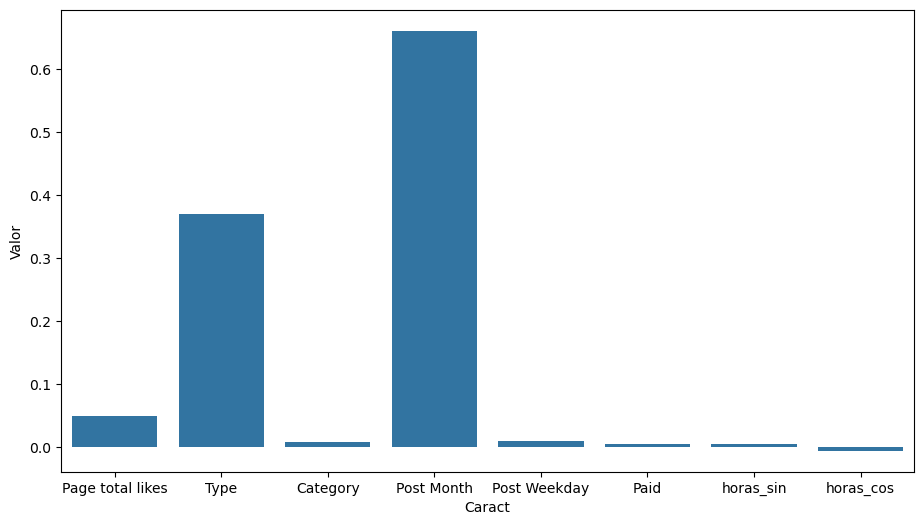

In [68]:
plt.figure(figsize=(11, 6))
sns.barplot(data=importanciaCar,x='Caract',y='Valor')
plt.show()
# +++++++++++++ Section to add code ends +++++++++++++++++++++

#### ++++++++ Section for adding text begins: +++++++++++
#### **Exercise 6b**


In the resulting graph, you can clearly see that there are three features that predominate over the rest:

1. Post Month
2. Type
3. Total Page Likes

And when compared to the article, we see that they also have the same features; however, they have a completely different distribution, with "Type" at the top, followed by "Total Page Likes," and finally "Month," the complete opposite of our order.


#### ++++++++ Section for adding text ends. +++++++++++

## **Exercise 7**

### **Include your final conclusions from the Activity.**

#### ++++++++ Section for adding text begins: +++++++++++
This activity helped me understand that hyperparameter search is not trivial; it requires effort, dedication, and time (or a lot of computational resources). You have to know what function each parameter performs and, if necessary, iterate through different sets of values in your searches to find the right one.

Furthermore, while the results obtained in activity six are encouraging (we arrived at the same most important features as in the article), the difference between the importance levels of the article and those found indicates that the model can be improved even further.
#### ++++++++ Section for adding text ends. +++++++++++

**End of Week 7 Activity**